In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


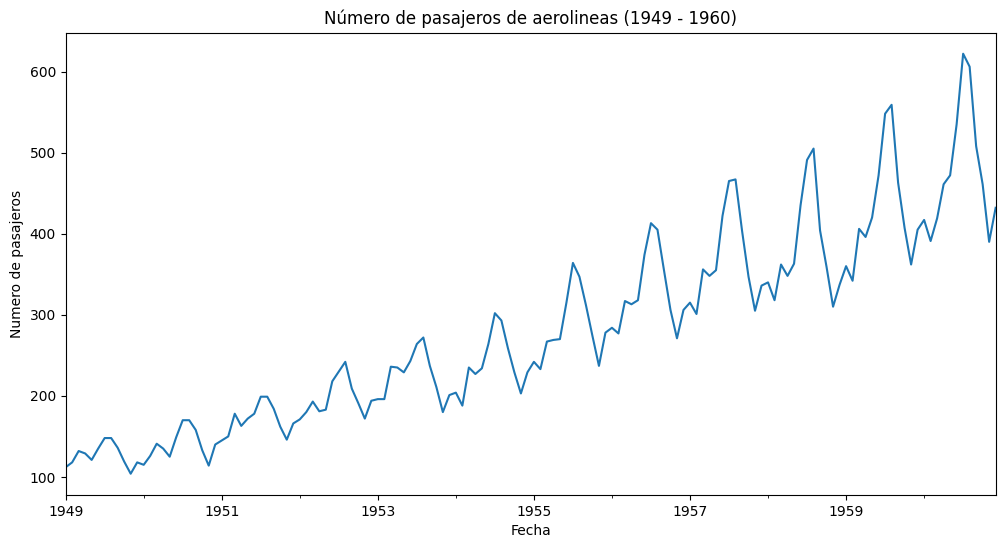

In [18]:
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12  
}

flights['month'] = flights['month'].map(month_to_num)

flights['date'] = pd.to_datetime(flights[['year', 'month']].assign(day=1))

flights_series = flights.set_index('date')['passengers']

plt.figure(figsize=(12, 6))
flights_series.plot()
plt.title('Número de pasajeros de aerolineas (1949 - 1960)')
plt.xlabel('Fecha')
plt.ylabel('Numero de pasajeros')
plt.show()

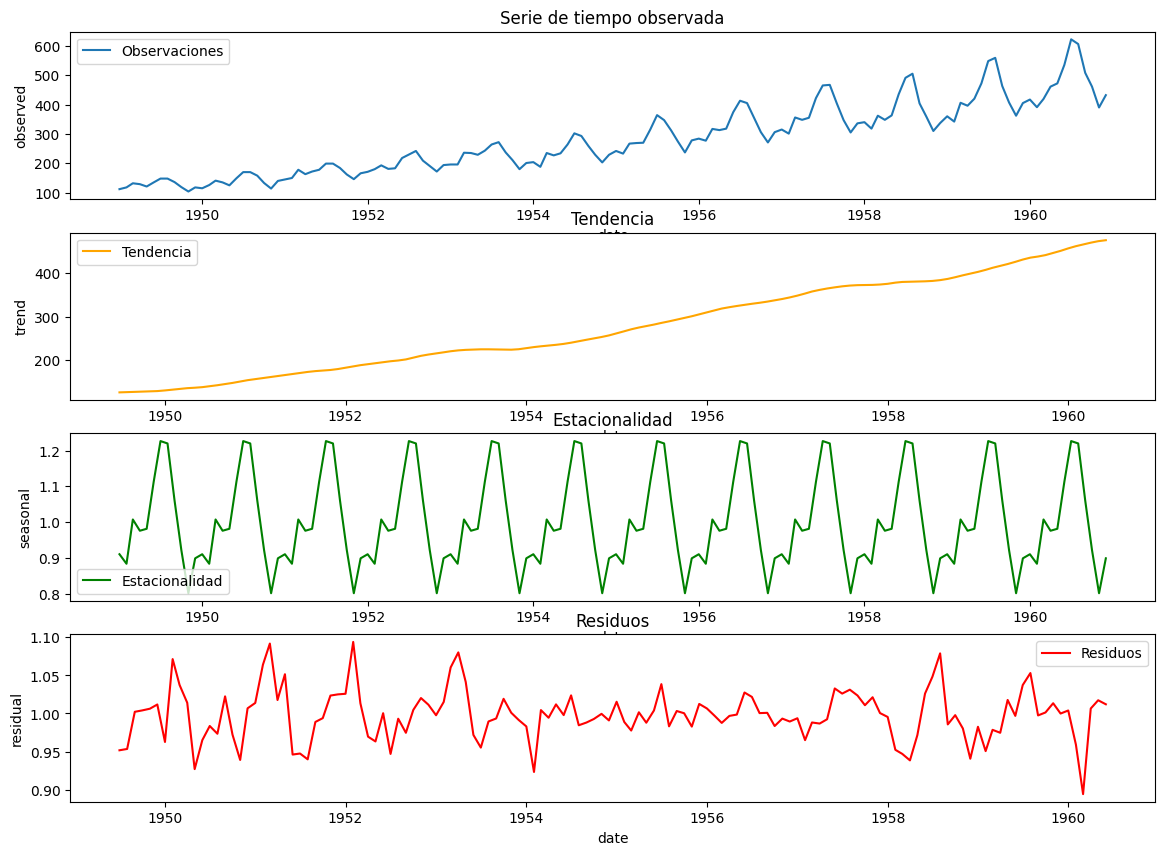

In [32]:
result = seasonal_decompose(flights_series, model='multiplicative')

decomp_df = pd.DataFrame({   'observed': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid 
}).reset_index()

plt.figure(figsize=(14, 10))

plt.subplot(411)
sns.lineplot(data=decomp_df, x='date', y='observed', label= "Observaciones")
plt.title('Serie de tiempo observada')

plt.subplot(412)
sns.lineplot(data=decomp_df, x='date', y='trend', label= "Tendencia", color='orange')
plt.title("Tendencia")

plt.subplot(413)
sns.lineplot(data=decomp_df, x='date', y='seasonal', label='Estacionalidad', color='green')
plt.title('Estacionalidad')

plt.subplot(414)
sns.lineplot(data=decomp_df, x='date', y='residual', label='Residuos', color='red')
plt.title('Residuos')

plt.show()